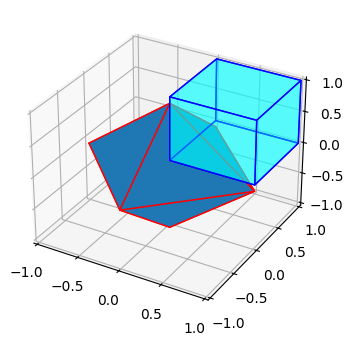

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import scipy


# Funkce pro vytvoření bodů krychle
def cube_definition(corner, length):
    points = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                       [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]])
    points = points * length
    points += np.array(corner)
    Z = points
    verts = [[Z[0], Z[1], Z[2], Z[3]],
             [Z[4], Z[5], Z[6], Z[7]],
             [Z[0], Z[1], Z[5], Z[4]],
             [Z[2], Z[3], Z[7], Z[6]],
             [Z[1], Z[2], Z[6], Z[5]],
             [Z[4], Z[7], Z[3], Z[0]]]
    return verts


# Funkce pro vykreslení konvexního mnohostěnu (oktaedru)
def draw_octahedron(center, size):
    # Vytvoření bodů oktaedru
    points = np.array([[0, 0, size], [0, 0, -size], [size, 0, 0],
                       [-size, 0, 0], [0, size, 0], [0, -size, 0]]) + center

    # Definice ploch oktaedru
    faces = [[points[i] for i in [0, 2, 4]], [points[i] for i in [0, 3, 4]],
             [points[i] for i in [0, 2, 5]], [points[i] for i in [0, 3, 5]],
             [points[i] for i in [1, 2, 4]], [points[i] for i in [1, 3, 4]],
             [points[i] for i in [1, 2, 5]], [points[i] for i in [1, 3, 5]]]

    return faces


fig = plt.figure(figsize=(4, 5))
ax = fig.add_subplot(111, projection='3d')

# Vytvoření krychle - můžete změnit rohový bod a délku
verts = cube_definition([0, 0, 0], 1)

# Vykreslení krychle
ax.add_collection3d(Poly3DCollection(verts,
                                     facecolors='cyan', linewidths=1, edgecolors='b', alpha=0.4))

faces = draw_octahedron([0, 0, -0.1], 1)

ax.add_collection3d(Poly3DCollection(faces, linewidths=1, edgecolors='r', alpha=1))

# Nastavení limitů pro osy pro lepší zobrazení
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

plt.savefig("gjk-notgood.pdf", bbox_inches='tight')




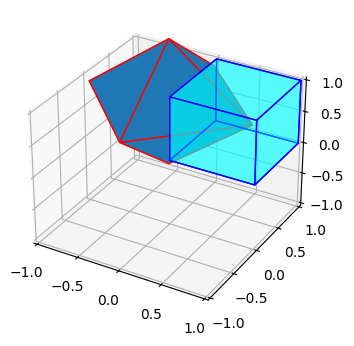

In [6]:
fig = plt.figure(figsize=(4, 5))
ax = fig.add_subplot(111, projection='3d')

# Vytvoření krychle - můžete změnit rohový bod a délku
verts = cube_definition([0, 0, 0], 1)

# Vykreslení krychle
ax.add_collection3d(Poly3DCollection(verts,
                                     facecolors='cyan', linewidths=1, edgecolors='b', alpha=0.4))

faces = draw_octahedron([-0.3, 0.5, 0.5], 1)

ax.add_collection3d(Poly3DCollection(faces, linewidths=1, edgecolors='r', alpha=1))

# Nastavení limitů pro osy pro lepší zobrazení
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

plt.savefig("gjk-good.pdf", bbox_inches='tight')




In [7]:
size = 1
center = [0, 0, 0]
points = np.array([[0, 0, size], [0, 0, -size], [size, 0, 0], [-size, 0, 0], [0, size, 0], [0, -size, 0]]) + center

corner = [0, 0, 0]
points_k = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]])
length = 1
points_k = points_k * length
points_k += np.array(corner)

points, points_k

(array([[ 0,  0,  1],
        [ 0,  0, -1],
        [ 1,  0,  0],
        [-1,  0,  0],
        [ 0,  1,  0],
        [ 0, -1,  0]]),
 array([[0, 0, 0],
        [1, 0, 0],
        [1, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 1],
        [1, 1, 1],
        [0, 1, 1]]))

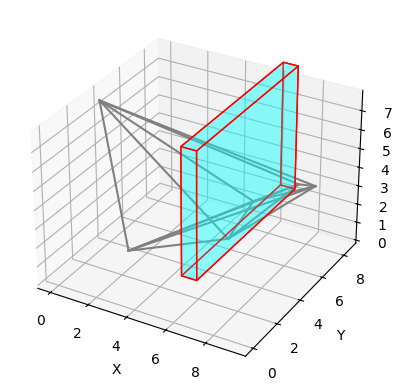

Je mezi krychlí a mnohostěnem kolize? True
Box box(Point(5.911174310199709, 0.7839380638774762,1.8170885418234384), Point(6.671481305892067, 9.218648019321753,8.428486602202412));
std::vector<Point> vertexPoint = {
  Point(7.050142268186815, 2.7071499446360514, 2.977574552286333),
  Point(7.63848720084837, 7.796373904120667, 3.152732540655591),
  Point(9.280452006951343, 6.3305249768016605, 4.357803631722504),
  Point(0.14962359673750814, 3.244131475826543, 7.891819775371697),
  Point(4.878064287855209, 8.533254495079897, 0.9781324495264387),
  Point(3.5747166111508752, 0.24975605301210346, 2.7168276212764075),
};


In [8]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


def generuj_krychli(min_val, max_val):
    """Generuje spodní přední a horní zadní roh krychle v 3D prostoru."""
    x1, y1, z1 = random.uniform(min_val, max_val), random.uniform(min_val, max_val), random.uniform(min_val, max_val)
    x2, y2, z2 = x1 + random.uniform(min_val, max_val), y1 + random.uniform(min_val, max_val), z1 + random.uniform(
        min_val, max_val)
    return [(x1, y1, z1), (x2, y2, z2)]


def generuj_mnohosten(min_val, max_val, pocet_vrcholu):
    """Generuje vrcholy náhodného mnohostěnu v 3D prostoru."""
    return [(random.uniform(min_val, max_val), random.uniform(min_val, max_val), random.uniform(min_val, max_val)) for _
            in range(pocet_vrcholu)]


def zobraz_objekty(krychle, mnohosten):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Kreslení krychle
    krychle_vrcholy = [
        [krychle[0], (krychle[1][0], krychle[0][1], krychle[0][2]), (krychle[1][0], krychle[0][1], krychle[1][2]),
         (krychle[0][0], krychle[0][1], krychle[1][2])],  # Spodní stěna
        [krychle[1], (krychle[0][0], krychle[1][1], krychle[1][2]), (krychle[0][0], krychle[1][1], krychle[0][2]),
         (krychle[1][0], krychle[1][1], krychle[0][2])],  # Horní stěna
        [krychle[0], (krychle[1][0], krychle[0][1], krychle[0][2]), (krychle[1][0], krychle[1][1], krychle[0][2]),
         (krychle[0][0], krychle[1][1], krychle[0][2])],  # Přední stěna
        [krychle[1], (krychle[0][0], krychle[1][1], krychle[1][2]), (krychle[0][0], krychle[0][1], krychle[1][2]),
         (krychle[1][0], krychle[0][1], krychle[1][2])],  # Zadní stěna
        [krychle[0], (krychle[0][0], krychle[1][1], krychle[0][2]), (krychle[0][0], krychle[1][1], krychle[1][2]),
         (krychle[0][0], krychle[0][1], krychle[1][2])],  # Levá stěna
        [krychle[1], (krychle[1][0], krychle[0][1], krychle[1][2]), (krychle[1][0], krychle[0][1], krychle[0][2]),
         (krychle[1][0], krychle[1][1], krychle[0][2])]  # Pravá stěna
    ]
    ax.add_collection3d(Poly3DCollection(krychle_vrcholy, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

    # Kreslení mnohostěnu
    for i in range(len(mnohosten)):
        for j in range(i + 1, len(mnohosten)):
            ax.plot([mnohosten[i][0], mnohosten[j][0]], [mnohosten[i][1], mnohosten[j][1]],
                    [mnohosten[i][2], mnohosten[j][2]], 'gray')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()


def printToCpp(krychla, mnogosten):
    print(
        f"Box box(Point({krychla[0][0]}, {krychla[0][1]},{krychla[0][2]}), Point({krychla[1][0]}, {krychla[1][1]},{krychla[1][2]}));"
    )
    print("std::vector<Point> vertexPoint = {")
    for i in mnohosten:
        print(f"  Point({i[0]}, {i[1]}, {i[2]}),")
    print("};")


def kolize(krychle, mnohosten):
    # Výpočet AABB pro mnohostěn
    min_x = min([bod[0] for bod in mnohosten])
    max_x = max([bod[0] for bod in mnohosten])
    min_y = min([bod[1] for bod in mnohosten])
    max_y = max([bod[1] for bod in mnohosten])
    min_z = min([bod[2] for bod in mnohosten])
    max_z = max([bod[2] for bod in mnohosten])

    # Kontrola překryvu v každé ose
    kolize_x = (krychle[0][0] <= max_x and krychle[1][0] >= min_x)
    kolize_y = (krychle[0][1] <= max_y and krychle[1][1] >= min_y)
    kolize_z = (krychle[0][2] <= max_z and krychle[1][2] >= min_z)

    return kolize_x and kolize_y and kolize_z


# Generování objektů
krychle = generuj_krychli(0, 10)
mnohosten = generuj_mnohosten(0, 10, 6)

# Zobrazit objekty
zobraz_objekty(krychle, mnohosten)

je_kolize = kolize(krychle, mnohosten)
print("Je mezi krychlí a mnohostěnem kolize?", je_kolize)

printToCpp(krychle, mnohosten)


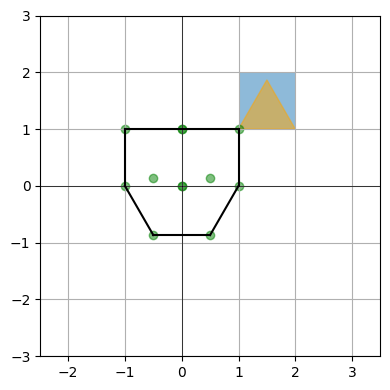

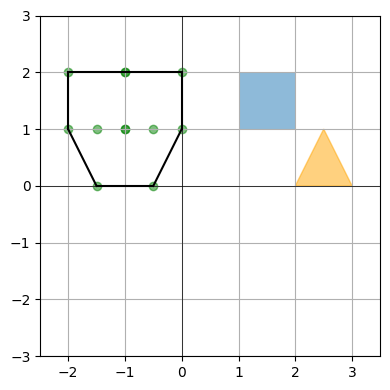

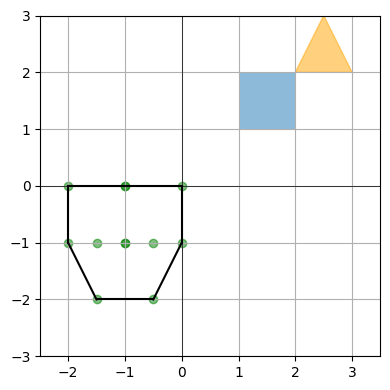

<module 'matplotlib.pyplot' from '/home/jvlk/Obrazky/bp/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [9]:
def plot_nside(vertices, title="Shape Plot"):
    """
    Plot a shape defined by a set of vertices points.

    Parameters:
    - vertices: np.array of shape (n, 2), representing n vertices of the shape.
    - title: string, the title of the plot.
    """
    # Ensure the shape is closed by appending the first vertex at the end
    closed_vertices = np.vstack([vertices, vertices[0]])

    # Plotting
    plt.figure(figsize=(6, 6))
    plt.plot(closed_vertices[:, 0], closed_vertices[:, 1], marker='o')
    plt.fill(closed_vertices[:, 0], closed_vertices[:, 1], alpha=0.3)
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axis('equal')  # Ensure equal aspect ratio
    plt.grid(True)
    plt.show()


def compute_minkowski_difference(A, B):
    """
    Compute the Minkowski difference between two sets of vertices A and B.

    Parameters:
    - A: np.array of shape (n, 2), representing n vertices of the first shape.
    - B: np.array of shape (m, 2), representing m vertices of the second shape.

    Returns:
    - np.array of points forming the Minkowski difference between A and B.
    """
    # Initialize an empty list to store the result points
    C_points = []

    # Compute the difference between each pair of points (a in A, b in B)
    for a in A:
        for b in B:
            diff_point = a - b
            C_points.append(diff_point)

    # Convert the list of points to a numpy array for further processing and return it
    return np.array(C_points)


from scipy.spatial import ConvexHull


def plot_minkawski(A, B, name):
    C = compute_minkowski_difference(A, B)
    # Visualization
    plt.figure(figsize=(4, 4))

    # Plot set A
    ax = fig.add_subplot(1, 1, 1)
    plt.fill(A[:, 0], A[:, 1], alpha=0.5, label='Set A')

    plt.fill(B[:, 0], B[:, 1], alpha=0.5, color='orange', label='Set B')

    plt.scatter(C[:, 0], C[:, 1], alpha=0.5, color='green', label='A - B')
    # plt.title('Minkowski Difference (A - B)')

    origin = np.array([2, 2])  # Origin point

    # Plot each point in the set as a vector

    plt.axis('equal')

    # Compute the convex hull of the set of points
    hull = ConvexHull(C)

    for simplex in hull.simplices:
        plt.plot(C[simplex, 0], C[simplex, 1], 'k-')

    plt.axhline(color='black', lw=0.5)
    plt.axvline(color='black', lw=0.5)

    plt.grid()

    plt.xlim(-3, 4)
    plt.ylim(-3, 3)

    plt.tight_layout()
    plt.savefig(name)
    plt.show()

    return plt


A = np.array(
    [
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1]
    ]
) + 1

B = np.array([
    [0, 0], [1, 0], [0.5, np.sqrt(3) / 2]
]) + 1

plot_minkawski(A, B, "minkowksi_overlap.pdf")

B = np.array([
    [2.0, 0], [2.5, 1], [3, 0]
])

plot_minkawski(A, B, "minkowksi_notoverlap.pdf")

B += [0, 2]

plot_minkawski(A, B, "minkowksi_notoverlap2.pdf")


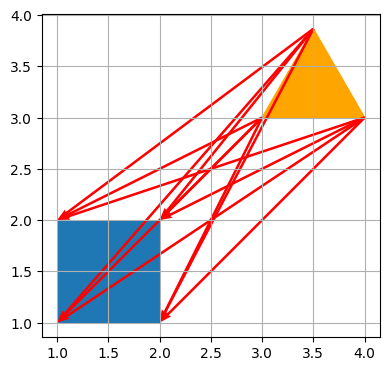

In [10]:
def plot_minkawski_2(A, B, name):
    C = compute_minkowski_difference(A, B)
    # Visualization
    plt.figure(figsize=(4, 4))

    # Plot set A
    ax = fig.add_subplot(1, 1, 1)
    plt.fill(A[:, 0], A[:, 1], alpha=1, label='Set A')

    plt.fill(B[:, 0], B[:, 1], alpha=1, color='orange', label='Set B')

    origin = np.array([2, 2])  # Origin point

    # Plot each point in the set as a vector

    for a in B:
        for b in A:
            plt.quiver(*a, *(-a + b), angles='xy', scale_units='xy', scale=1, alpha=1, color="r")

    plt.grid()
    plt.tight_layout()

    plt.axis('equal')
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    plt.savefig(name)
    plt.show()


A = np.array(
    [
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1]
    ]
) + 1

B = np.array([
    [0, 0], [1, 0], [0.5, np.sqrt(3) / 2]
]) + 3

plot_minkawski_2(A, B, "minkowksi_desc.pdf")


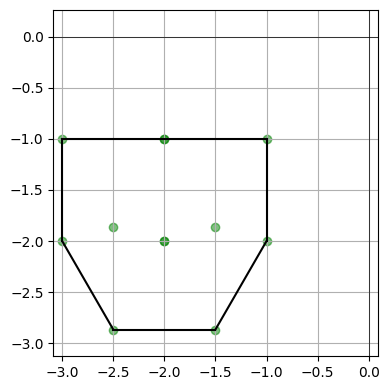

<module 'matplotlib.pyplot' from '/home/jvlk/Obrazky/bp/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [11]:
def plot_minkawski_3(A, B, name):
    C = compute_minkowski_difference(A, B)
    # Visualization
    plt.figure(figsize=(4, 4))

    plt.scatter(C[:, 0], C[:, 1], alpha=0.5, color='green', label='A - B')
    # plt.title('Minkowski Difference (A - B)')

    origin = np.array([2, 2])  # Origin point

    # Plot each point in the set as a vector

    plt.axis('equal')

    # Compute the convex hull of the set of points
    hull = ConvexHull(C)

    for simplex in hull.simplices:
        plt.plot(C[simplex, 0], C[simplex, 1], 'k-')

    plt.axhline(color='black', lw=0.5)
    plt.axvline(color='black', lw=0.5)

    plt.grid()
    plt.tight_layout()
    plt.savefig(name)
    plt.show()

    return plt


A = np.array(
    [
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1]
    ]
) + 1

B = np.array([
    [0, 0], [1, 0], [0.5, np.sqrt(3) / 2]
]) + 3

plot_minkawski_3(A, B, "minkowksi_c.pdf")

GJK

In [12]:
def support(colliderA, colliderB, direction):
    # Calculate the furthest point on colliderA in the given direction
    pointA = find_furthest_point(direction, colliderA)
    # Calculate the furthest point on colliderB in the opposite direction
    pointB = find_furthest_point(-d, colliderB)
    # Return the difference of the two points
    return pointA - pointB


def find_furthest_point(direction, vertices):
    max_point = None
    max_distance = float('-inf')

    for vertex in vertices:
        distance = dot(vertex, direction)
        if distance > max_distance:
            max_distance = distance
            max_point = vertex

    return max_point


def dot(v1, v2):
    return sum(x * y for x, y in zip(v1, v2))


def GJK(colliderA, colliderB):
    # Initial arbitrary direction
    direction = [1, 0, 0]
    # Get initial support point in any direction
    support_point = support(colliderA, colliderB, direction)
    # Initialize simplex as a list containing the support point
    simplex = [support_point]

    while True:
        # Update the support point in the current direction
        support_point = support(colliderA, colliderB, direction)

        # Check if the new support point fails to pass the origin in the direction
        if dot(support_point, direction) <= 0:
            return False  # No collision

        # Add the new support point to the beginning of the simplex list
        simplex.insert(0, support_point)

        # Update simplex and direction; check for collision
        if next_simplex(simplex, direction):
            return True  # Collision detected


def next_simplex(points, direction):
    if len(points) == 2:
        return line(points, direction)
    elif len(points) == 3:
        return triangle(points, direction)
    elif len(points) == 4:
        return tetrahedron(points, direction)
    else:
        # This should never happen if GJK is implemented correctly
        return False


import numpy as np


def same_direction(v1, v2):
    """Check if two vectors have the same direction."""
    return np.dot(v1, v2) > 0


def cross(v1, v2):
    """Cross product of v1 and v2."""
    return np.cross(v1, v2)


def line(points, direction):
    # Implementation of the Line case (simplified for this context)
    a = np.array(points[0])
    b = np.array(points[1])
    ao = -a
    ab = b - a
    if same_direction(ab, ao):
        direction = np.cross(np.cross(ab, ao), ab)
    else:
        points = [a.tolist()]
        direction = ao
    return False, points, direction.tolist()


def triangle(points, direction):
    a = np.array(points[0])
    b = np.array(points[1])
    c = np.array(points[2])

    ab = b - a
    ac = c - a
    ao = -a
    abc = cross(ab, ac)

    if same_direction(cross(abc, ac), ao):  # Check side of AC
        if same_direction(ac, ao):
            points = [a.tolist(), c.tolist()]
            direction = cross(cross(ac, ao), ac)
        else:
            # Simplify to the line case with AB
            return line([a.tolist(), b.tolist()], direction)
    else:
        if same_direction(cross(ab, abc), ao):  # Check side of AB
            # Simplify to the line case with AB
            return line([a.tolist(), b.tolist()], direction)
        else:
            if same_direction(abc, ao):  # Check directly above or below ABC
                direction = abc
            else:
                points = [a.tolist(), c.tolist(), b.tolist()]
                direction = -abc

    return False, points, direction.tolist()


def tetrahedron(points, direction):
    pass



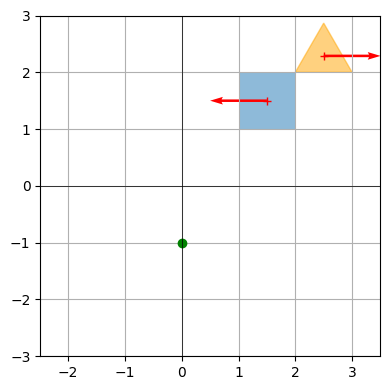

<module 'matplotlib.pyplot' from '/home/jvlk/Obrazky/bp/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [13]:

def plot_minkawski_4(A, B, name, center_A, center_B, direction):
    C = compute_minkowski_difference(A, B)
    # Visualization
    plt.figure(figsize=(4, 4))

    # Plot set A
    ax = fig.add_subplot(1, 1, 1)
    plt.fill(A[:, 0], A[:, 1], alpha=0.5, label='Set A')

    plt.fill(B[:, 0], B[:, 1], alpha=0.5, color='orange', label='Set B')

    # plt.title('Minkowski Difference (A - B)')

    origin = np.array([2, 2])  # Origin point

    # Plot each point in the set as a vector

    plt.axis('equal')

    sup = support(A, B, direction)
    plt.plot(sup[0], sup[1], "go")

    plt.plot(center_A[0], center_A[1], 'r+')
    plt.plot(center_B[0], center_B[1], 'r+')

    plt.quiver(center_A[0], center_A[1], direction[0], direction[1], angles='xy', scale_units='xy', scale=1, alpha=1,
               color="r")
    plt.quiver(center_B[0], center_B[1], -direction[0], -direction[1], angles='xy', scale_units='xy', scale=1, alpha=1,
               color="r")

    plt.axhline(color='black', lw=0.5)
    plt.axvline(color='black', lw=0.5)

    plt.grid()

    plt.xlim(-3, 4)
    plt.ylim(-3, 3)

    plt.tight_layout()
    plt.savefig(name)
    plt.show()

    return plt


A = np.array(
    [
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1]
    ]
) + 1

A_center = np.mean(A, axis=0)

B = np.array([
    [0, 0], [1, 0], [0.5, np.sqrt(3) / 2]
]) + 2

B_center = [(B[0][0] + B[1][0] + B[2][0]) / 3, (B[0][1] + B[1][1] + B[2][1]) / 3]

d = np.array([1, 0])

support(A, B, d)

plot_minkawski_4(A, B, "support.pdf", B_center, A_center, d)


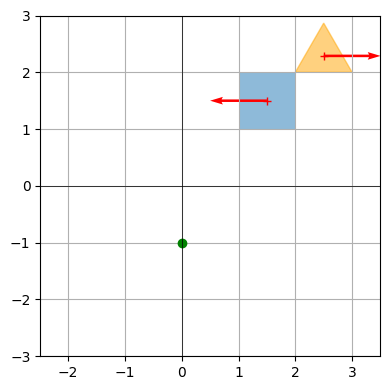

<module 'matplotlib.pyplot' from '/home/jvlk/Obrazky/bp/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [14]:
def plot_minkawski_5(A, B, name, center_A, center_B, direction):
    C = compute_minkowski_difference(A, B)
    # Visualization
    plt.figure(figsize=(4, 4))

    # Plot set A
    ax = fig.add_subplot(1, 1, 1)
    plt.fill(A[:, 0], A[:, 1], alpha=0.5, label='Set A')

    plt.fill(B[:, 0], B[:, 1], alpha=0.5, color='orange', label='Set B')

    # plt.title('Minkowski Difference (A - B)')

    origin = np.array([2, 2])  # Origin point

    # Plot each point in the set as a vector

    plt.axis('equal')

    sup = support(A, B, direction)
    plt.plot(sup[0], sup[1], "go")

    plt.plot(center_A[0], center_A[1], 'r+')
    plt.plot(center_B[0], center_B[1], 'r+')

    plt.quiver(center_A[0], center_A[1], direction[0], direction[1], angles='xy', scale_units='xy', scale=1, alpha=1,
               color="r")
    plt.quiver(center_B[0], center_B[1], -direction[0], -direction[1], angles='xy', scale_units='xy', scale=1, alpha=1,
               color="r")

    plt.axhline(color='black', lw=0.5)
    plt.axvline(color='black', lw=0.5)

    plt.grid()
 
    plt.xlim(-3, 4)
    plt.ylim(-3, 3)

    plt.tight_layout()
    plt.savefig(name)
    plt.show()

    return plt


A = np.array(
    [
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1]
    ]
) + 1

A_center = np.mean(A, axis=0)

B = np.array([
    [0, 0], [1, 0], [0.5, np.sqrt(3) / 2]
]) + 2

B_center = [(B[0][0] + B[1][0] + B[2][0]) / 3, (B[0][1] + B[1][1] + B[2][1]) / 3]

d = np.array([1, 0])

support(A, B, d)

plot_minkawski_5(A, B, "gjk_point.pdf", B_center, A_center, d)

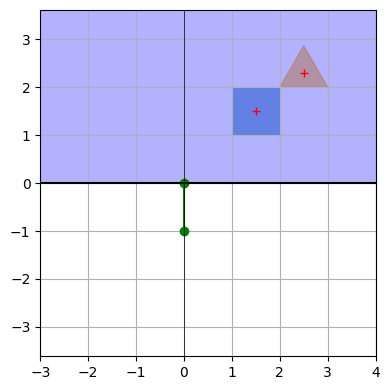

<module 'matplotlib.pyplot' from '/home/jvlk/Obrazky/bp/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [15]:
def plot_minkawski_5(A, B, name, center_A, center_B, direction):
    C = compute_minkowski_difference(A, B)
    # Visualization
    plt.figure(figsize=(4, 4))

    # Plot set A
    ax = fig.add_subplot(1, 1, 1)
    plt.fill(A[:, 0], A[:, 1], alpha=0.5, label='Set A')

    plt.fill(B[:, 0], B[:, 1], alpha=0.5, color='orange', label='Set B')

    # plt.title('Minkowski Difference (A - B)')

    origin = np.array([2, 2])  # Origin point

    # Plot each point in the set as a vector

    plt.axis('equal')

    sup = support(A, B, direction)

    minus_sup = -sup

    sup2 = support(A, B, -sup)
    plt.plot(sup[0], sup[1], "go")
    plt.plot(sup2[0], sup2[1], "go")

    plt.plot([sup[0], sup2[0]], [sup[1], sup2[1]], 'g-', label='y=x')

    plt.plot(center_A[0], center_A[1], 'r+')
    plt.plot(center_B[0], center_B[1], 'r+')


    x = np.linspace(-10, 10, 1000)
    y = np.zeros_like(x)
    plt.plot(x, y, 'k-', label='y=x')
    plt.fill_between(x, y, y + 5, color='blue', alpha=0.3, label='Polo-průhledná oblast')

    plt.axhline(color='black', lw=0.5)
    plt.axvline(color='black', lw=0.5)

    plt.grid()

    plt.xlim(-3, 4)
    plt.ylim(-3, 3)

    plt.tight_layout()
    plt.savefig(name)
    plt.show()

    return plt


A = np.array(
    [
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1]
    ]
) + 1

A_center = np.mean(A, axis=0)

B = np.array([
    [0, 0], [1, 0], [0.5, np.sqrt(3) / 2]
]) + 2

B_center = [(B[0][0] + B[1][0] + B[2][0]) / 3, (B[0][1] + B[1][1] + B[2][1]) / 3]

d = np.array([1, 0])

support(A, B, d)

plot_minkawski_5(A, B, "gjk_line.pdf", B_center, A_center, d)

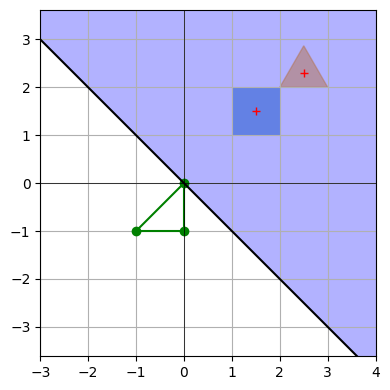

<module 'matplotlib.pyplot' from '/home/jvlk/Obrazky/bp/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [16]:
def plot_minkawski_6(A, B, name, center_A, center_B, direction):
    C = compute_minkowski_difference(A, B)
    # Visualization
    plt.figure(figsize=(4, 4))

    # Plot set A
    ax = fig.add_subplot(1, 1, 1)
    plt.fill(A[:, 0], A[:, 1], alpha=0.5, label='Set A')

    plt.fill(B[:, 0], B[:, 1], alpha=0.5, color='orange', label='Set B')

    # plt.title('Minkowski Difference (A - B)')

    origin = np.array([2, 2])  # Origin point

    # Plot each point in the set as a vector

    plt.axis('equal')

    sup = support(A, B, direction)

    minus_sup = -sup

    sup2 = support(A, B, -sup)
    sup3 = support(A, B, [0, 0])
    plt.plot(sup[0], sup[1], "go")
    plt.plot(sup2[0], sup2[1], "go")
    plt.plot(sup3[0], sup3[1], "go")
    
    plt.plot([sup[0], sup2[0]], [sup[1], sup2[1]], 'g-', label='y=x')
    plt.plot([sup[0], sup3[0]], [sup[1], sup3[1]], 'g-', label='y=x')
    plt.plot([sup3[0], sup2[0]], [sup3[1], sup2[1]], 'g-', label='y=x')

    plt.plot(center_A[0], center_A[1], 'r+')
    plt.plot(center_B[0], center_B[1], 'r+')

    # plt.quiver(sup2[0], sup2[1], sup3[0], sup3[1], angles='xy', scale_units='xy', scale=1, alpha=1, color="green")

    x = np.linspace(-100, 100, 10000)
    y = -x
    plt.plot(x, y, 'k-', label='y=x')
    plt.fill_between(x, y, y+50, color='blue', alpha=0.3, label='Polo-průhledná oblast')

    plt.axhline(color='black', lw=0.5)
    plt.axvline(color='black', lw=0.5)

    plt.grid()

    plt.xlim(-3, 4)
    plt.ylim(-3, 3)

    plt.tight_layout()
    plt.savefig(name)
    plt.show()

    return plt


A = np.array(
    [
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1]
    ]
) + 1

A_center = np.mean(A, axis=0)

B = np.array([
    [0, 0], [1, 0], [0.5, np.sqrt(3) / 2]
]) + 2

B_center = [(B[0][0] + B[1][0] + B[2][0]) / 3, (B[0][1] + B[1][1] + B[2][1]) / 3]

d = np.array([1, 0])

support(A, B, d)

plot_minkawski_6(A, B, "gjk_triangle_bad.pdf", B_center, A_center, d)

[ 0.2 -0.8]


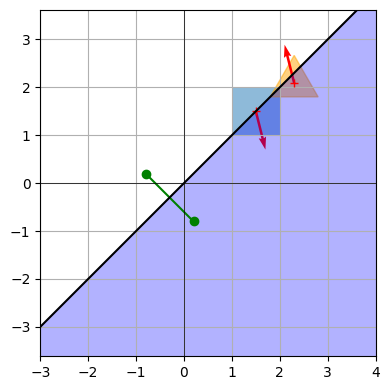

<module 'matplotlib.pyplot' from '/home/jvlk/Obrazky/bp/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [17]:
def plot_minkawski_7(A, B, name, center_A, center_B, direction):
    C = compute_minkowski_difference(A, B)
    # Visualization
    plt.figure(figsize=(4, 4))

    # Plot set A
    ax = fig.add_subplot(1, 1, 1)
    plt.fill(A[:, 0], A[:, 1], alpha=0.5, label='Set A')

    plt.fill(B[:, 0], B[:, 1], alpha=0.5, color='orange', label='Set B')

    # plt.title('Minkowski Difference (A - B)')

    origin = np.array([2, 2])  # Origin point

    # Plot each point in the set as a vector

    plt.axis('equal')

    sup = support(A, B, direction)

    minus_sup = -sup

    sup2 = support(A, B, -sup)
    
    plt.plot([sup[0], sup2[0]], [sup[1], sup2[1]], 'g-', label='y=x')
    
    plt.plot(sup[0], sup[1], "go")
    plt.plot(sup2[0], sup2[1], "go")


    plt.plot(center_A[0], center_A[1], 'r+')
    plt.plot(center_B[0], center_B[1], 'r+')

    plt.quiver(center_A[0], center_A[1], minus_sup[0], minus_sup[1], angles='xy', scale_units='xy', scale=1, alpha=1,
               color="r")
    plt.quiver(center_B[0], center_B[1], -minus_sup[0], -minus_sup[1], angles='xy', scale_units='xy', scale=1, alpha=1,
               color="r")
    # plt.quiver(sup[0],sup[1], -sup[0],-sup[1], angles='xy', scale_units='xy', scale=1, alpha=1, color="green")

    x = np.linspace(-10, 10, 1000)
    y = x
    plt.plot(x, y, 'k-', label='y=x')
    plt.fill_between(x, y-40, y, color='blue', alpha=0.3, label='Polo-průhledná oblast')

    plt.axhline(color='black', lw=0.5)
    plt.axvline(color='black', lw=0.5)

    plt.grid()

    plt.xlim(-3, 4)
    plt.ylim(-3, 3)

    plt.tight_layout()
    plt.savefig(name)
    plt.show()

    return plt


A = np.array(
    [
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1]
    ]
) + 1

A_center = np.mean(A, axis=0)

B = np.array([
    [0, 0], [1, 0], [0.5, np.sqrt(3) / 2]
]) + 1.8

B_center = [(B[0][0] + B[1][0] + B[2][0]) / 3, (B[0][1] + B[1][1] + B[2][1]) / 3]

d = np.array([1, 0])

print(support(A, B, d))

plot_minkawski_7(A, B, "gjk_line_2.pdf", B_center, A_center, d)

[0.2 0.2]


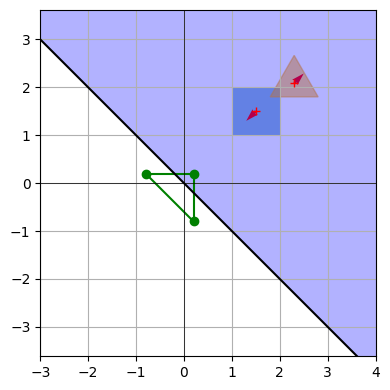

<module 'matplotlib.pyplot' from '/home/jvlk/Obrazky/bp/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [18]:
def plot_minkawski_8(A, B, name, center_A, center_B, direction):
    C = compute_minkowski_difference(A, B)
    # Visualization
    plt.figure(figsize=(4, 4))

    # Plot set A
    ax = fig.add_subplot(1, 1, 1)
    plt.fill(A[:, 0], A[:, 1], alpha=0.5, label='Set A')

    plt.fill(B[:, 0], B[:, 1], alpha=0.5, color='orange', label='Set B')

    # plt.title('Minkowski Difference (A - B)')

    origin = np.array([2, 2])  # Origin point

    # Plot each point in the set as a vector

    plt.axis('equal')

    sup = support(A, B, direction)

    minus_sup = -sup

    sup2 = support(A, B, -sup)
    sup3 = support(A, B, (0.2,0.2))
    print(sup3)
    
    plt.plot([sup[0], sup2[0]], [sup[1], sup2[1]], 'g-', label='y=x')
    plt.plot([sup[0], sup3[0]], [sup[1], sup3[1]], 'g-', label='y=x')
    plt.plot([sup3[0], sup2[0]], [sup3[1], sup2[1]], 'g-', label='y=x')
    
    
    plt.plot(sup[0], sup[1], "go")
    plt.plot(sup2[0], sup2[1], "go")
    plt.plot(sup3[0], sup3[1], "go")

    plt.plot(center_A[0], center_A[1], 'r+')
    plt.plot(center_B[0], center_B[1], 'r+')

    plt.quiver(center_A[0], center_A[1], (0.2,0.2)[0], (0.2,0.2)[1], angles='xy', scale_units='xy', scale=1, alpha=1,
               color="r")
    plt.quiver(center_B[0], center_B[1], -(0.2,0.2)[0], -(0.2,0.2)[1], angles='xy', scale_units='xy', scale=1, alpha=1,
               color="r")
    # plt.quiver(sup[0],sup[1], -sup[0],-sup[1], angles='xy', scale_units='xy', scale=1, alpha=1, color="green")

    x = np.linspace(-10, 10, 1000)
    y = -x
    plt.plot(x, y, 'k-', label='y=x')
    plt.fill_between(x, y, y + 50, color='blue', alpha=0.3, label='Polo-průhledná oblast')

    plt.axhline(color='black', lw=0.5)
    plt.axvline(color='black', lw=0.5)

    plt.grid()

    plt.xlim(-3, 4)
    plt.ylim(-3, 3)

    plt.tight_layout()
    plt.savefig(name)
    plt.show()

    return plt




B_center = [(B[0][0] + B[1][0] + B[2][0]) / 3, (B[0][1] + B[1][1] + B[2][1]) / 3]

d = np.array([1, 0])

support(A, B, d)

plot_minkawski_8(A, B, "gjk_triangle_2.pdf", B_center, A_center, d)